In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['dark_background'])
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
housing=pd.read_csv('house_train.csv')

In [5]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
numerical_vars = ['SalePrice','LotArea', 'OverallQual', 'OverallCond', 
                  'YearBuilt', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr']
categorical_vars = ['MSZoning', 'LotShape', 'Neighborhood', 'CentralAir', 'SaleCondition', 'MoSold', 'YrSold']

In [8]:
final_data=housing[numerical_vars+categorical_vars]

In [9]:
final_data.head()

,SalePrice,LotArea,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,BedroomAbvGr,MSZoning,LotShape,Neighborhood,CentralAir,SaleCondition,MoSold,YrSold
0,208500,8450,7,5,2003,856,854,3,RL,Reg,CollgCr,Y,Normal,2,2008
1,181500,9600,6,8,1976,1262,0,3,RL,Reg,Veenker,Y,Normal,5,2007
2,223500,11250,7,5,2001,920,866,3,RL,IR1,CollgCr,Y,Normal,9,2008
3,140000,9550,7,5,1915,961,756,3,RL,IR1,Crawfor,Y,Abnorml,2,2006
4,250000,14260,8,5,2000,1145,1053,4,RL,IR1,NoRidge,Y,Normal,12,2008


In [10]:
final_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [11]:
final_data['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

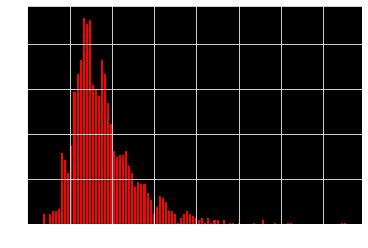

In [12]:
final_data['SalePrice'].hist(edgecolor='black', color='red', bins=100)

In [13]:
final_data['SalePrice'].skew() #???

1.8828757597682129

In [14]:
final_data['SalePrice'].kurt() 

6.536281860064529

### Numerical variable

In [15]:
final_data[numerical_vars].describe()

,SalePrice,LotArea,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,BedroomAbvGr
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,10516.828082,6.099315,5.575342,1971.267808,1162.626712,346.992466,2.866438
std,79442.502883,9981.264932,1.382997,1.112799,30.202904,386.587738,436.528436,0.815778
min,34900.000000,1300.000000,1.000000,1.000000,1872.000000,334.000000,0.000000,0.000000
25%,129975.000000,7553.500000,5.000000,5.000000,1954.000000,882.000000,0.000000,2.000000
50%,163000.000000,9478.500000,6.000000,5.000000,1973.000000,1087.000000,0.000000,3.000000
75%,214000.000000,11601.500000,7.000000,6.000000,2000.000000,1391.250000,728.000000,3.000000
max,755000.000000,215245.000000,10.000000,9.000000,2010.000000,4692.000000,2065.000000,8.000000


In [2]:
final_data[numerical_vars]

NameError: name 'final_data' is not defined

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000284112280C8>,
      dtype=object)

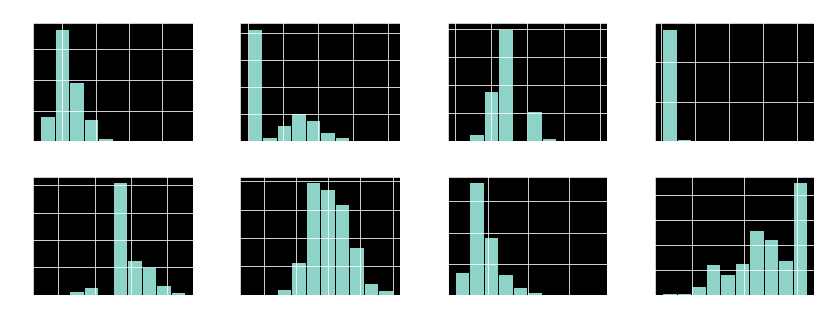

In [16]:
final_data[numerical_vars].hist(edgecolor='black',figsize=(14,5), layout=(2,4))

### Categorical variables

In [17]:
housing['SaleCondition'].value_counts(normalize=True)

Normal     0.820548
Partial    0.085616
Abnorml    0.069178
Family     0.013699
Alloca     0.008219
AdjLand    0.002740
Name: SaleCondition, dtype: float64

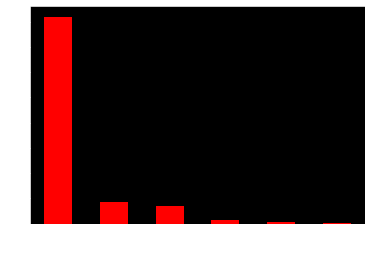

In [18]:
housing['SaleCondition'].value_counts(normalize=True).plot(kind='bar', color='red')

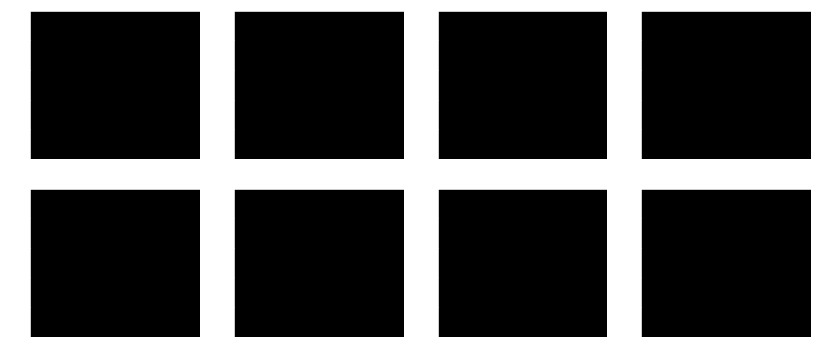

In [19]:
# 카테고리 변수들은 한 번 새로 거쳐서 나온 비율로 그걸 데이터로 만들기때문에 다름
fig, ax = plt.subplots(2,4,figsize=(14,6))

In [20]:
categorical_vars # 각각의 변수들을 ax[0]부터 차례로 넣을 생각!! 

['MSZoning',
 'LotShape',
 'Neighborhood',
 'CentralAir',
 'SaleCondition',
 'MoSold',
 'YrSold']

In [21]:
ax

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028411556048>,
      dtype=object)

In [22]:
for var, subplot in zip(categorical_vars, ax.flatten());

SyntaxError: invalid syntax (<ipython-input-22-7ed0c8450300>, line 1)